In [1]:
import numpy as np
from skimage.io import imread, imsave
from skimage.color import rgb2gray, gray2rgb, label2rgb
from skimage.filters import gaussian  #filtro para la deteccion de bordes
from skimage.filters import unsharp_mask  #filtro para la deteccion de bordes
import matplotlib.pyplot as plt
import cv2

In [2]:
import SimpleITK as sitk
def show_image(img, title=None):
    nda = sitk.GetArrayViewFromImage(img)
    plt.imshow(nda, cmap='gray')   
    plt.axis('off')
    if(title):
        plt.title(title, size=20)

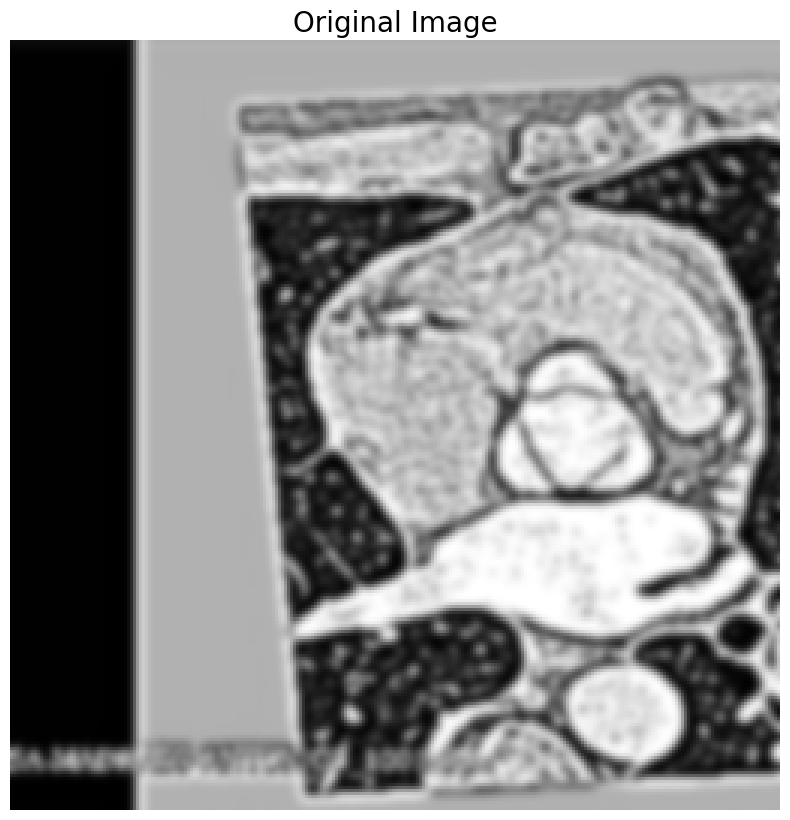

In [11]:
#Preprocesamiento
img = 255*rgb2gray(imread('../MarJo/3.jpg'))
img = img[:,161:960 ] #recorte de imagen
img = cv2.resize(img, [256,256])    

img = cv2.convertScaleAbs(img, alpha=1.1, beta=-1)  #alpha contrast   - beta = brightness
img = unsharp_mask(img, radius=1, amount=50)
img = gaussian(img, sigma=(1.6,1.6), truncate=3.8, channel_axis=2)
img = np.trunc(img * 255)
img = np.array(img, dtype=np.int64)

#Escritura de la imagen para su posterior lectura en 3DSlicer y obtener píxeles para la semilla
cv2.imwrite("pre_img.jpg", img)
    
#img = np.transpose(img, (2, 0, 1))
img_T1 = sitk.GetImageFromArray(img) 
img_T1_255 = sitk.Cast(sitk.RescaleIntensity(img_T1), sitk.sitkUInt8)
plt.figure(figsize=(10,10))
show_image(img_T1, "Original Image")



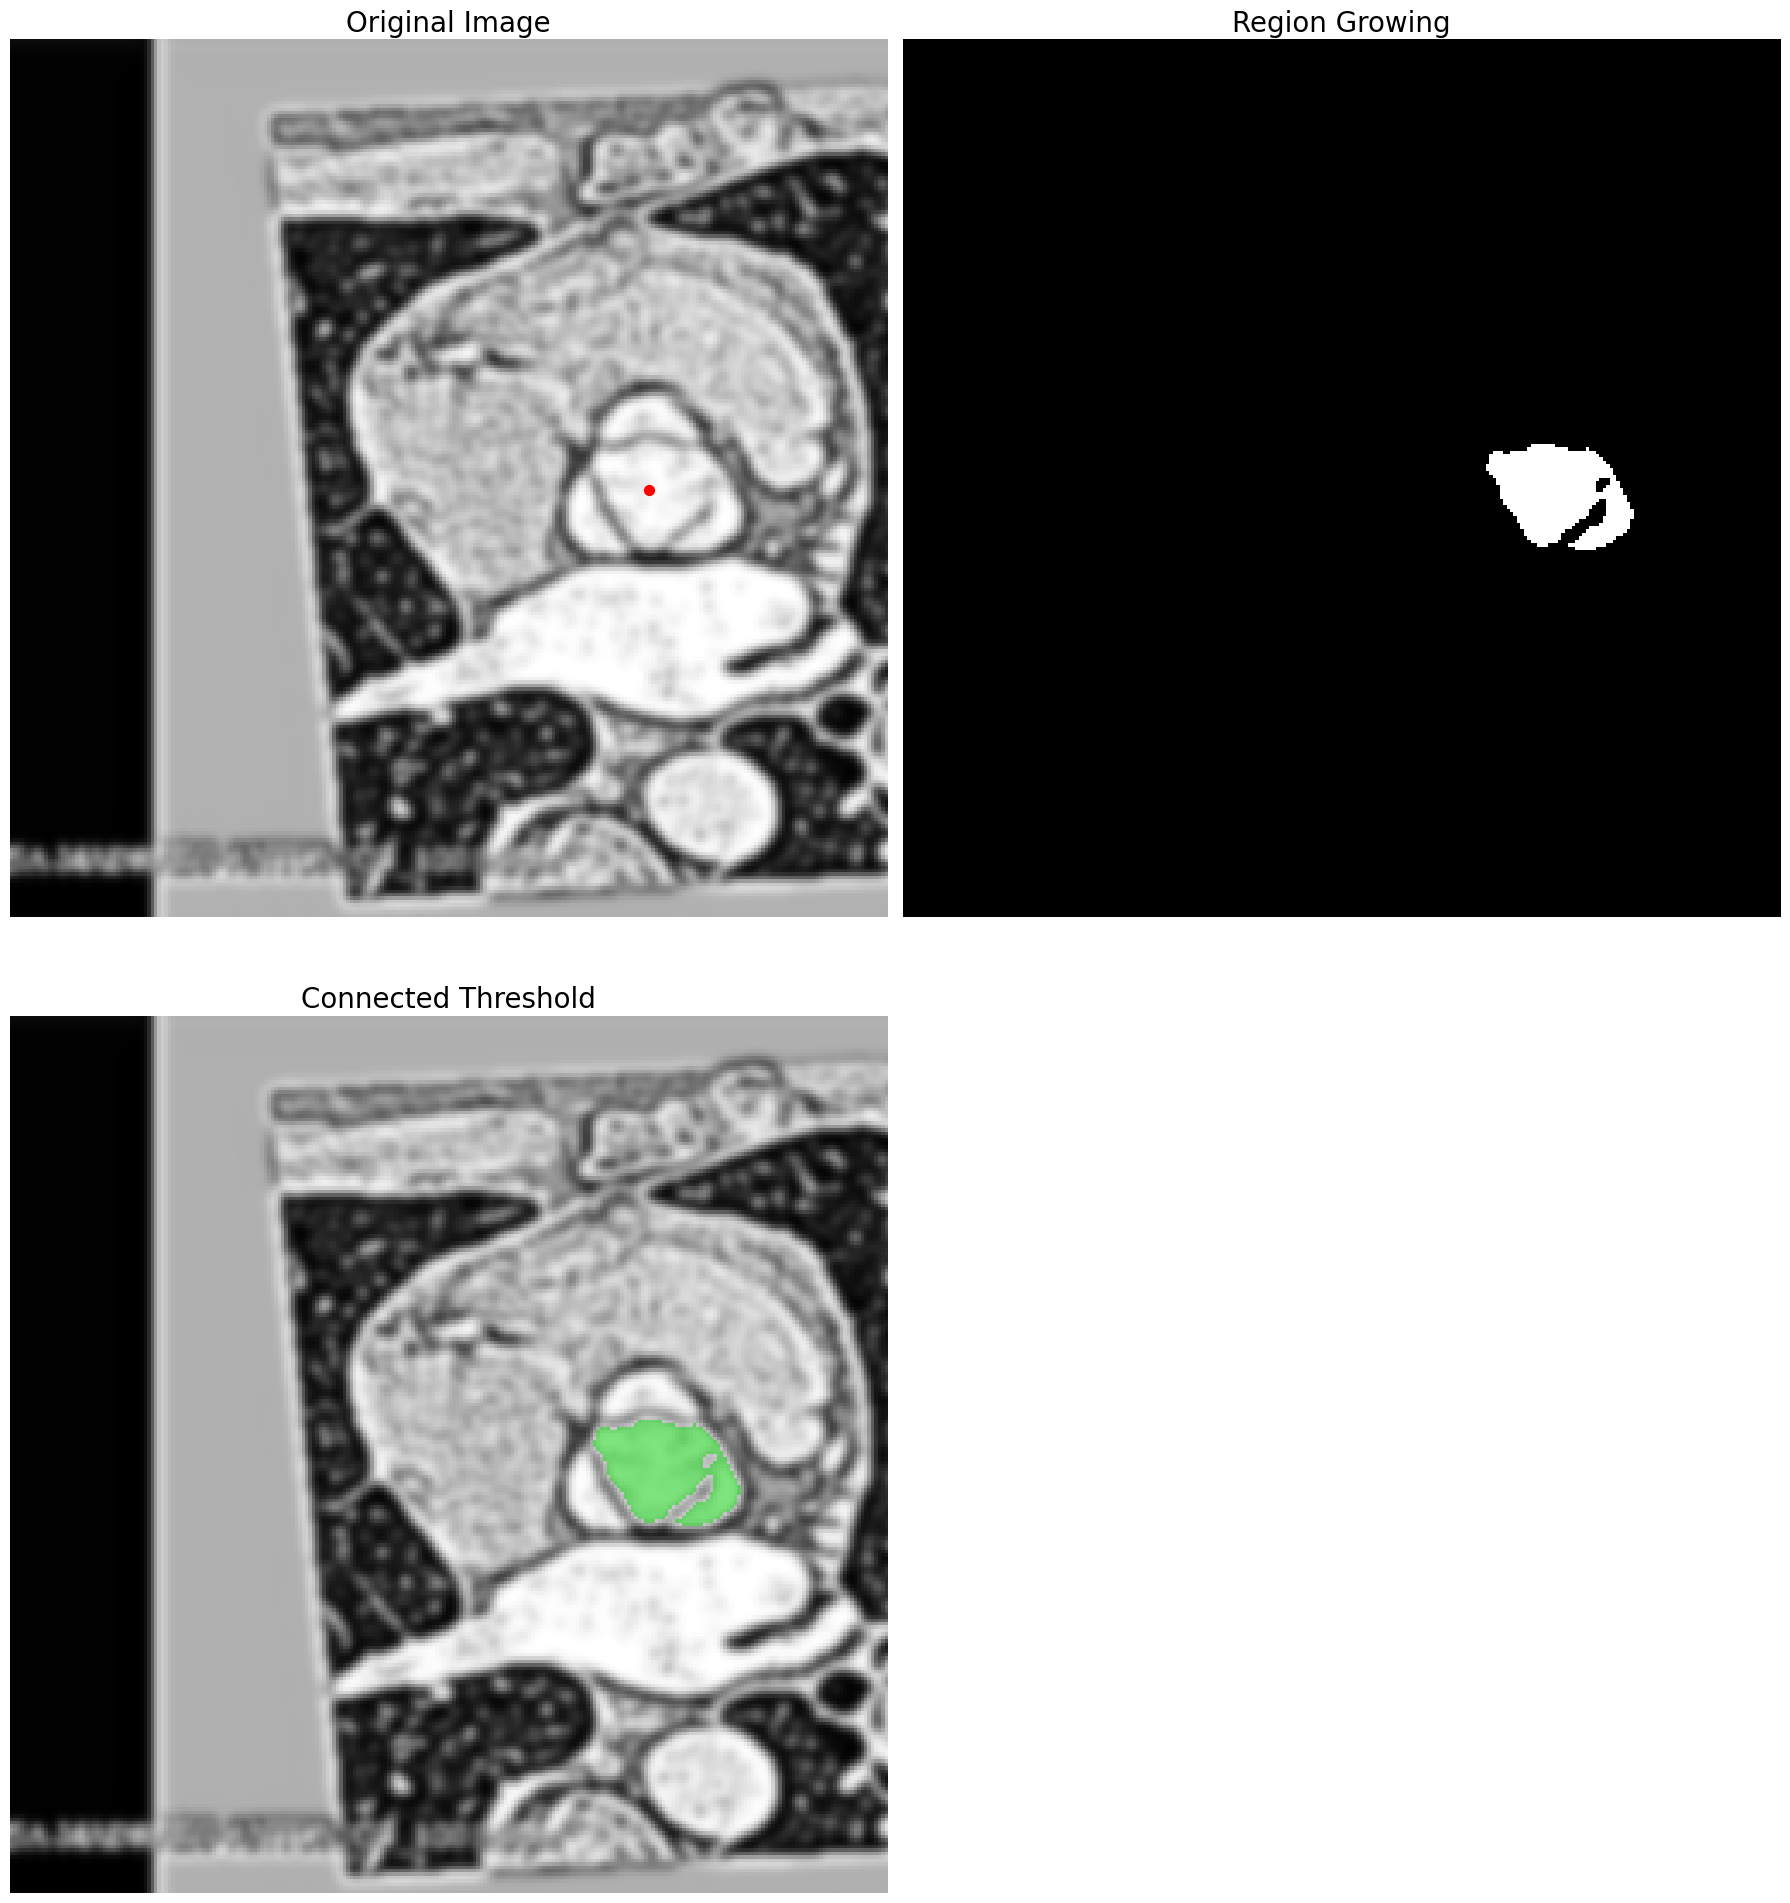

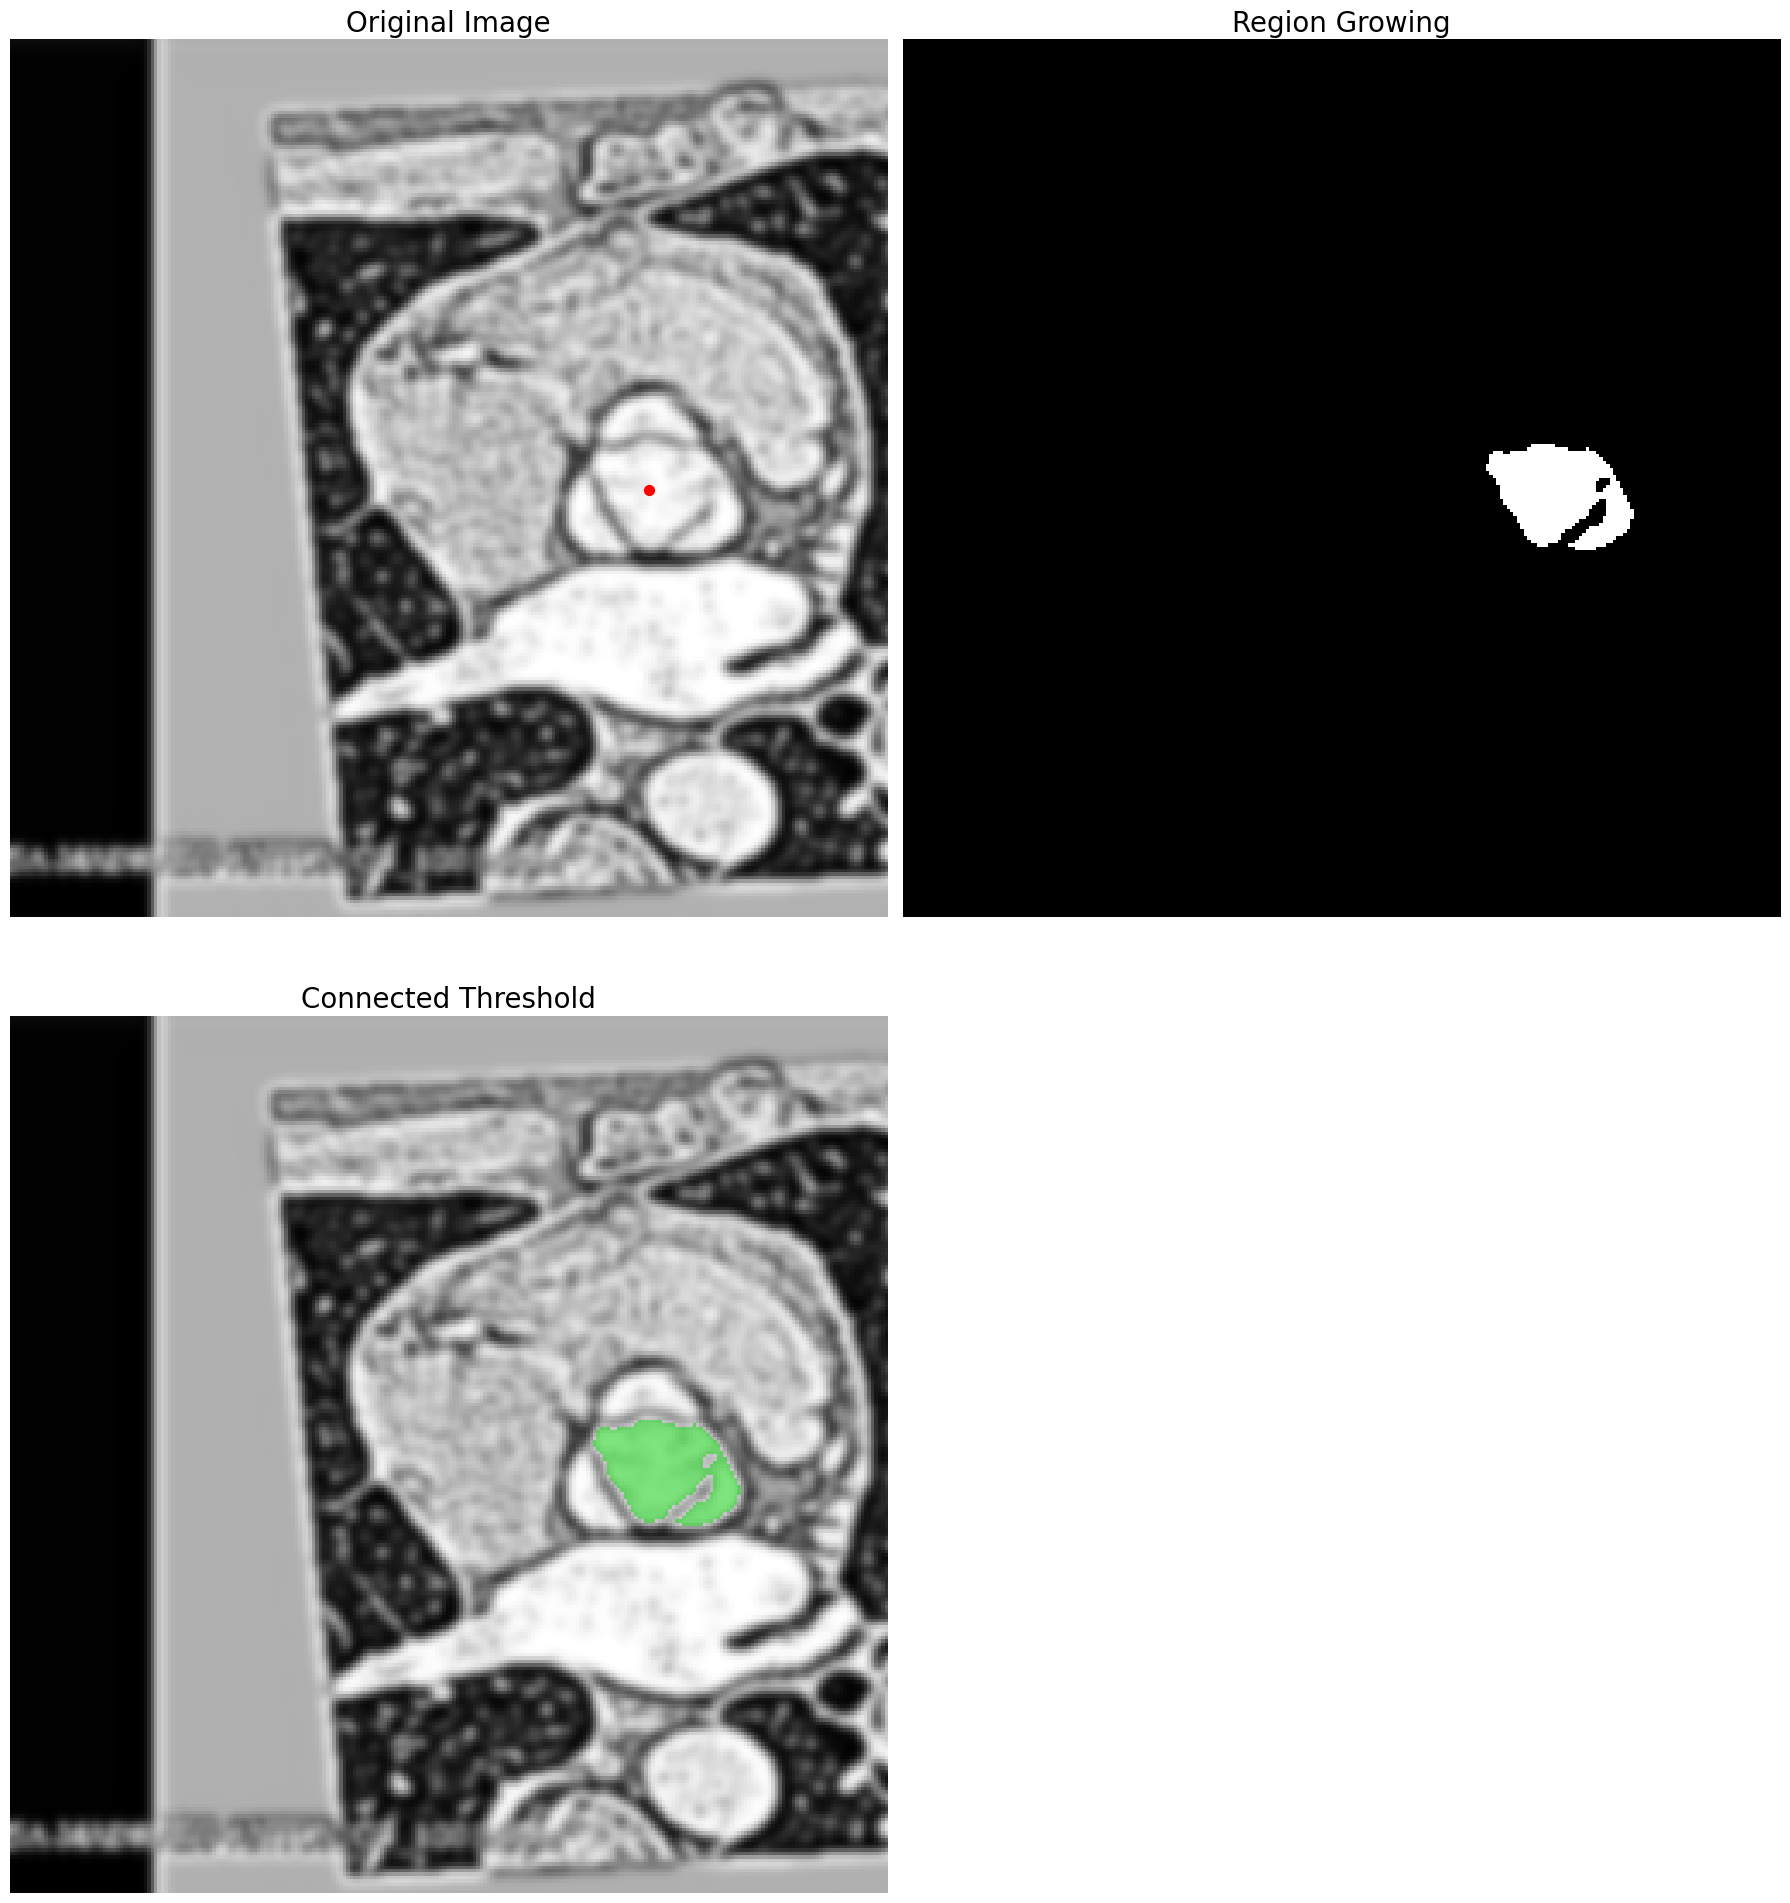

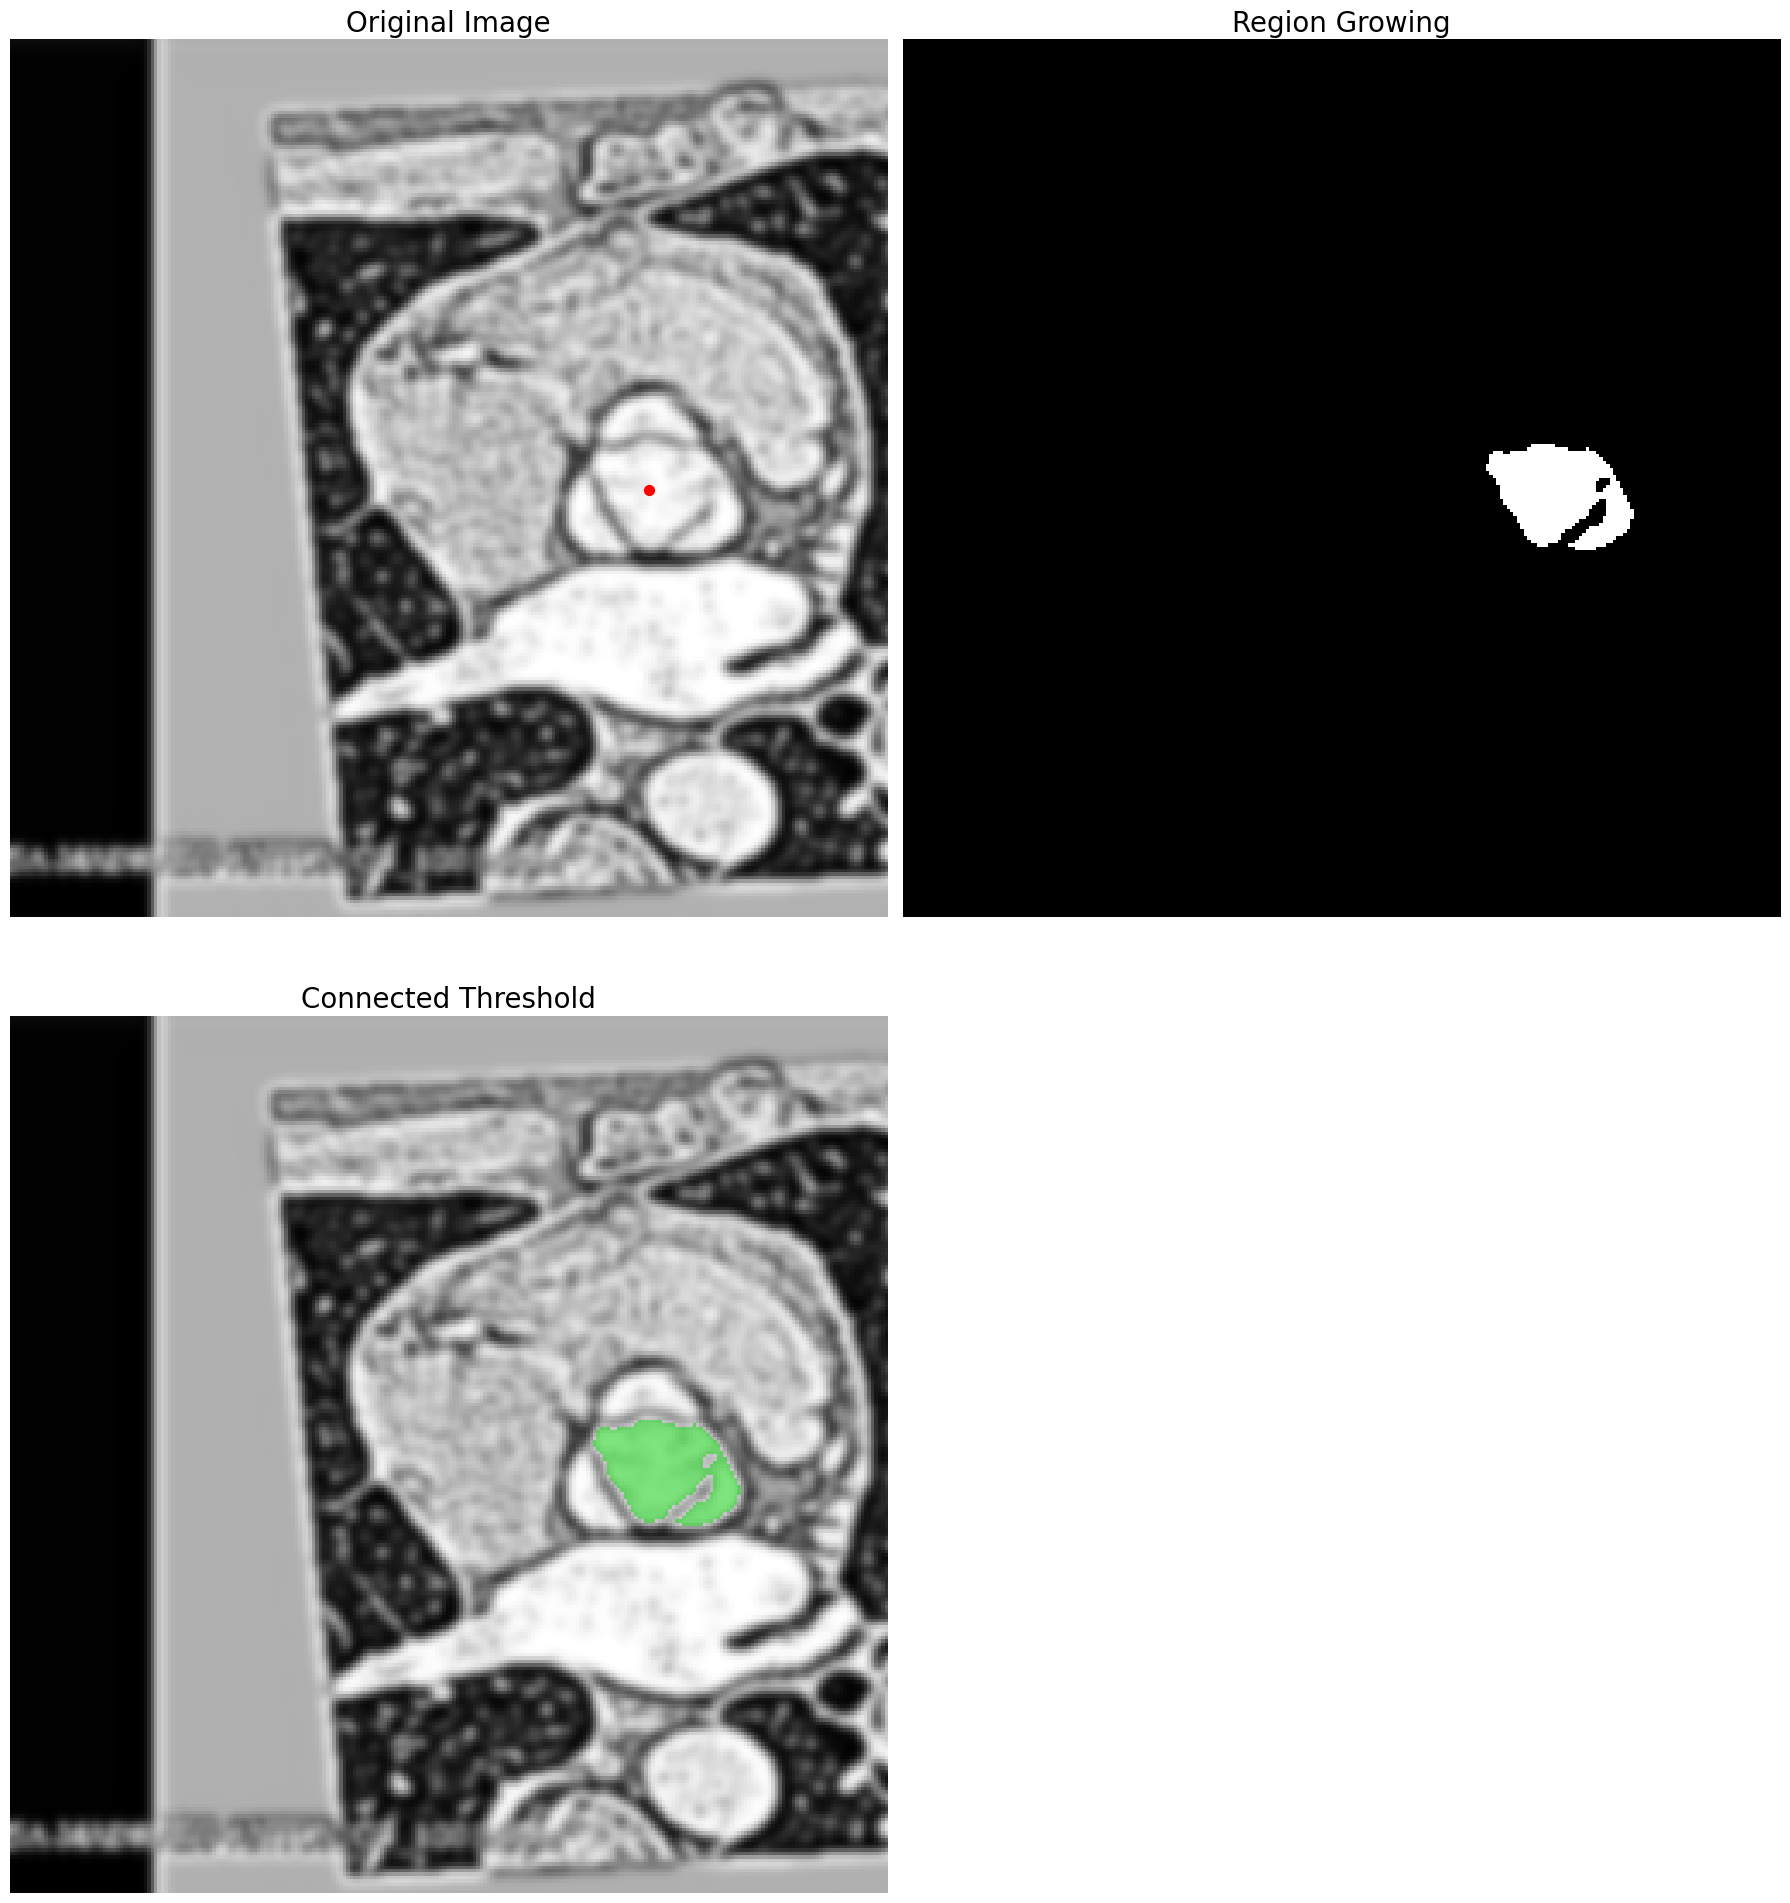

In [12]:


seed = (186,131)
for upper in [255, 254, 255]:
    plt.figure(figsize=(18,20))
    plt.subplot(221)
    show_image(img_T1, "Original Image")
    plt.scatter(seed[0], seed[1], color='red', s=50)
    plt.subplot(222)
    seg = sitk.ConnectedThreshold(img_T1, seedList=[seed], lower=200, upper=upper)
    show_image(seg, "Region Growing")
    plt.subplot(223)
    show_image(sitk.LabelOverlay(img_T1_255, seg), "Connected Threshold")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

